<a href="https://colab.research.google.com/github/sagarrokad1/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Loading Libraries & Data**

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime as dt
import squarify
from sklearn.cluster import KMeans
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading Dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Customer Segmentation - Sagar Rokad/Data/Online-Retail.csv')

### **Analysing Dataset**

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

####**Information about dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### **Checking null values**



In [8]:
# checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**There is many null values in CustomerID feature**

#**Data Preprocessing**

In [9]:
#converting InvoiceDate feature to datetime format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

**Dropping duplicated values**

In [10]:
#dropping redundant values
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(536641, 8)

In [12]:
#checking unique countries in dataset
df['Country'].nunique()

38

**So this online retail store serves in 37 countries according to given dataset.**

####**Top 5 Ordering Countries**

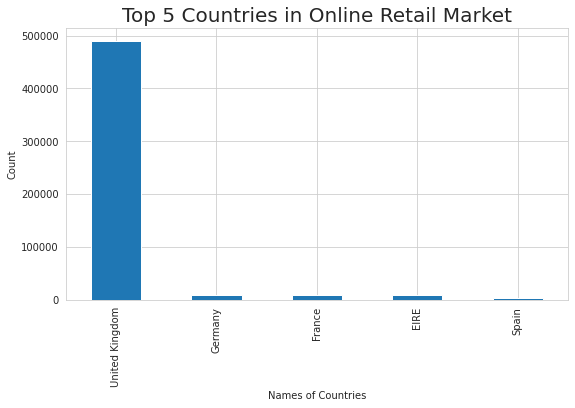

In [13]:
# plotting for top countries in the dataset
df['Country'].value_counts().head(5).plot.bar(figsize = (9, 5))
plt.title('Top 5 Countries in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

**This shows that we have most number of orders from UK. After that Germany, France, EIRE and on fifth we have Spain.**

####**Bottom 5 Ordering Countries**

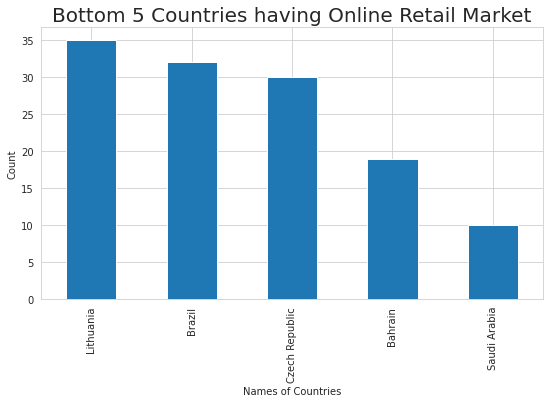

In [14]:
#plotting for bottom 5 countries in dataset 

df['Country'].value_counts().tail(5).plot.bar(figsize = (9, 5))
plt.title('Bottom 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

**This shows that we have very less number of customers from these countries especially middle east.**

**So in summary our retail working good in Europe continent.**

**No. of Unique Customers**

In [15]:
len(df.CustomerID.unique())

4373

**No. of unique products and stock codes**

In [16]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(df.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(df.Description.unique())}")

Number of unique item stock codes: 4070
Number of unique item descriptions: 4224


The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions. Let us examine the reasons behind this data quality issue:



In [17]:
#Find out the stock units that have more than one description
dfStockDesc = df.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,23131,5


Now, let us examine how a single unit code has multiple description:



In [18]:
df[df['StockCode'] == 
         dfStockDesc.StockCode.value_counts()
         [dfStockDesc.StockCode.value_counts()>1].reset_index()
         ['index'][8]]['Description'].unique()

array(['PLEASE ONE PERSON METAL SIGN', 'on cargo order', 'adjustment',
       'check', nan, 'dotcom'], dtype=object)

We notice that this description is a manually entered field and thus has discrepancies and inconsistencies. However, since the objective of this task is customer segmentation, we avoid exploring and resolving this issue further

### **Summary statastics**

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


*   We see 10 goods being sold on an average with a standard deviation of around 200. Also, the minimum quantity includes a negative value, this implies that the dataset includes returned items as well, a common scenario in retail domain.


*  The unit price field echoes the similar observations as Quantity variable.







### **Negative Values**

In [20]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [21]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Since nothing came back when we filtered the cancelled orders by Quantity > 0, this confirms that the negative values mean the order was cancelled.**

**How many orders were cancelled?**

In [22]:
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9251 cancelled orders.
Percentage of orders cancelled: 35.72% 


**9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations.**

**Now let's find out what a negative UnitPrice means.**

In [23]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


**The description of "Adjust bad debt" tells us that this is an adjustment for a customer with insufficient funds or an allowance for a customer who never paid for the order.**

### **Exploring the Orders**

**What's the average number of orders per customer ?**

In [24]:
#Find the unique number of InvoiceNo  per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [25]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


**The average number of orders per customer is 3.**

**What's the average number of unqiue items per order and per customer?**

In [26]:
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [27]:
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


In [28]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [29]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


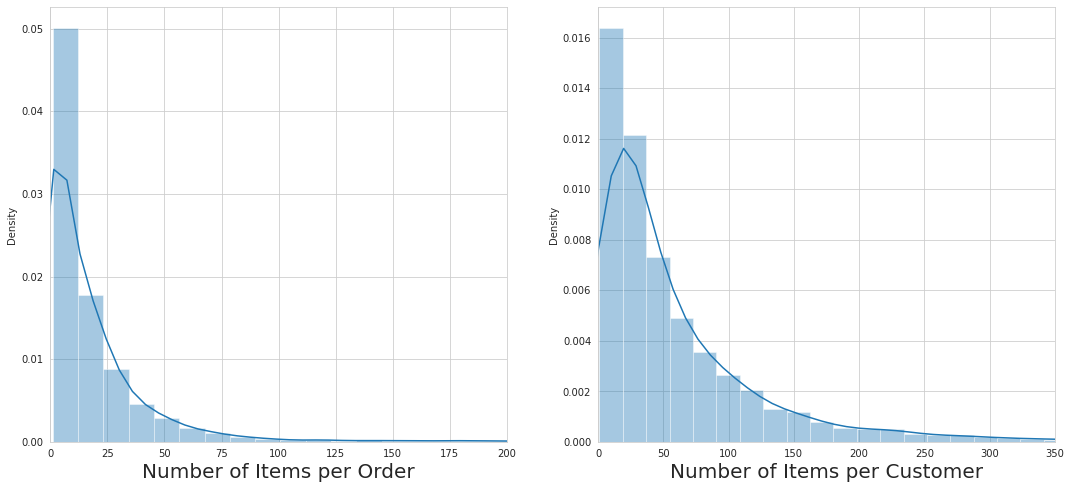

In [30]:
#Visualize the distribution of both

fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=20)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=20)
plt.show()

**We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 61.2.**

#### **What's the total number of customers per country?**

**Let's look at the number of customers by country to get an idea of which countries have the most orders.**

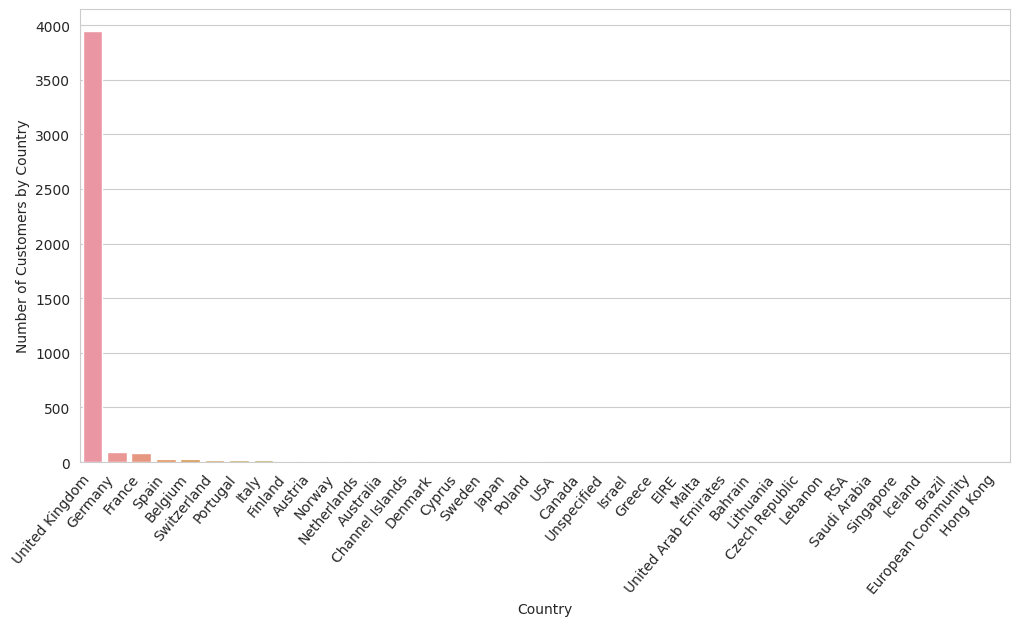

In [31]:
country_df = pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

**The United Kingdom has significantly more customers than the other countries in our data set, so their total cost should look similar.**

#### **What's the total revenue per country?**

In [32]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


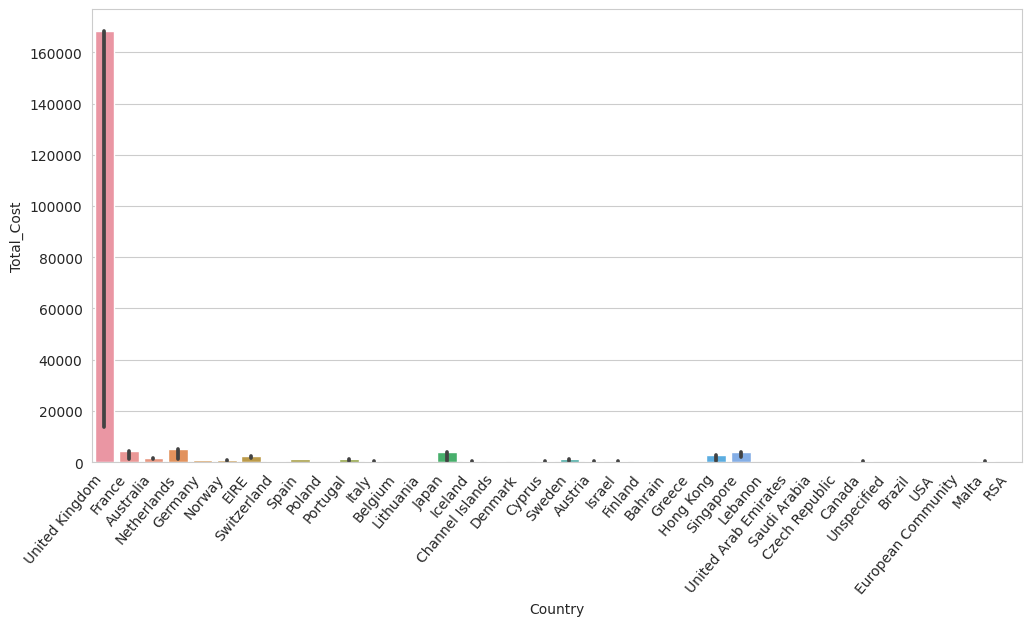

In [34]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

**The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.**

**More than 90% of the customers in the data are from United Kingdom, There is research indicating that customer clusters vary by geography, so we restrict the data to United Kingdom only.**

In [35]:
df_retail_uk = df.loc[df['Country'] == 'United Kingdom']

In [36]:
df_retail_uk.shape

(490300, 9)

In [37]:
df_uk=df_retail_uk.drop('Country',axis=1)

In [38]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [39]:
print("Percentage of customers from the UK: ", round(df_uk['CustomerID'].nunique() * 100 / df['CustomerID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique())

Percentage of customers from the UK:  90.35 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 3950


In [40]:
#Find minimum invoice date
df_uk['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [41]:
#Find maximum invoice date
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

### **Sales on weekdays**

Text(0.5, 0, 'Hours')

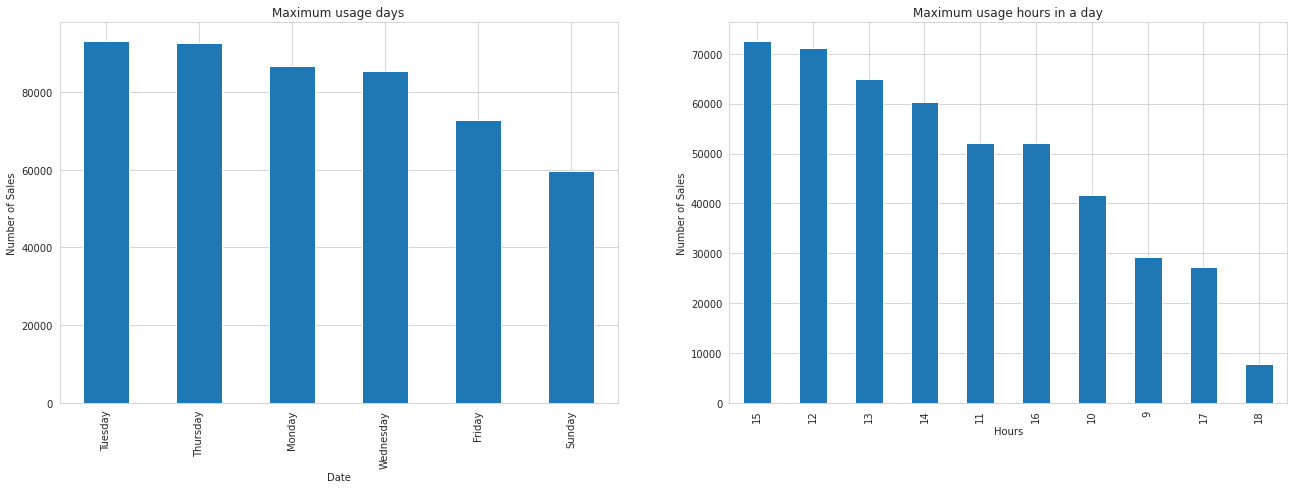

In [42]:
# Plot amount of sales on days of the week

import datetime as dt

fig,ax=plt.subplots(1,2)
df_uk.InvoiceDate.dt.day_name().value_counts().nlargest(10).plot(kind='bar', figsize=(20,7),ax=fig.axes[0])
ax[0].set_title("Maximum usage days")
ax[0].set_ylabel('Number of Sales')
ax[0].set_xlabel('Date')

df_uk.InvoiceDate.dt.hour.value_counts().nlargest(10).plot(kind='bar', figsize=(22,7),ax=fig.axes[1])
plt.title("Maximum usage hours in a day")
plt.ylabel('Number of Sales')
plt.xlabel('Hours')

**Maximum sales happen on Thursdays and Wednesdays around 11 AM to 4 PM and so we have to start triggering offers and special incentives on these days**

In [43]:
#adding day column in dataset
df_uk['Day']=df_uk['InvoiceDate'].dt.day_name()

In [44]:
#adding year, month, month day, hour information from InvoiceDate
df_uk["year"] = df_uk["InvoiceDate"].apply(lambda x: x.year)
df_uk["month"] = df_uk["InvoiceDate"].apply(lambda x: x.month)
df_uk["month_day"] = df_uk["InvoiceDate"].apply(lambda x: x.day)
df_uk["hour"] = df_uk["InvoiceDate"].apply(lambda x: x.hour)

In [45]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8


In [46]:
df_uk = df_uk[pd.notnull(df_uk['CustomerID'])]
df_uk.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Total_Cost     0
Day            0
year           0
month          0
month_day      0
hour           0
dtype: int64

In [47]:
df_uk.shape

(356728, 13)

In [48]:
## Percentage Negative values in Quantity column 

len(df_uk[df_uk.Quantity<0])*100/len(df_uk)

2.1027225224821153

**There are around 2% of negative quantity values that are going to be removed.**

In [49]:
#Choose only rows of data wherein Quantity is positive

df_uk = df_uk[(df_uk['Quantity']>0)]
df_uk.Quantity.min()

1

In [50]:
df_uk.shape

(349227, 13)

In [51]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,2010,12,1,8


### **Proportion of one time and repeat customers**

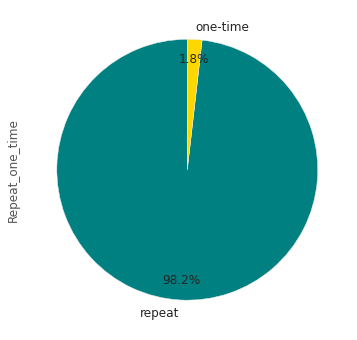

In [52]:
plt.figure(figsize=(12,6))

df_uk_custid=df_uk.CustomerID.value_counts().to_frame()
df_uk_custid['Repeat_one_time'] = np.where((df_uk_custid.CustomerID>1), 'repeat', 'one-time')

plt.style.use('ggplot')

media_df=df_uk_custid
media_per_user_group=media_df.groupby(['Repeat_one_time'])['Repeat_one_time'].count().nlargest(2)
media_per_user_group.plot(kind='pie', colors = ['teal','gold'], fontsize=12, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.show()

**The percentage of repeat customers are substantially more than the percentage of one-time customers. Mostly customers are happy with the retail store, We have to convert the one-time customers into repeat customers by offering them good incentives and proper service.**

#### **Top 5 Most Purchased Products**

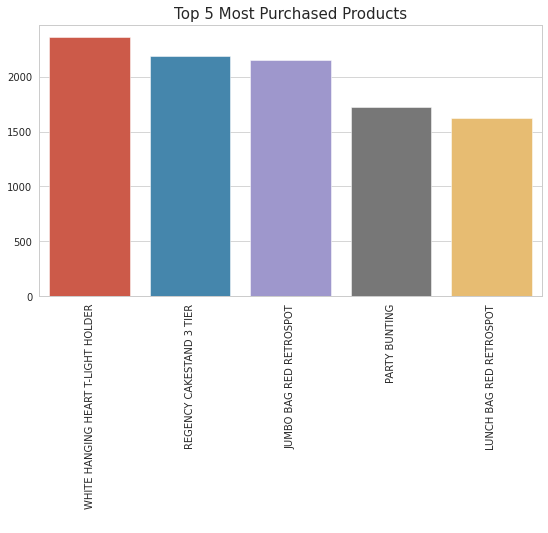

In [53]:
# The most purchased products from
sns.set_style("whitegrid")
most_purchase = df.groupby('Description')['Quantity'].count().sort_values(ascending=False)[:5]

plt.figure(figsize=(9,5))
sns.barplot(x=most_purchase.index, y=most_purchase.values)
plt.xticks(rotation=90)
plt.title("Top 5 Most Purchased Products", size=15)
plt.xlabel(" ")
plt.show()

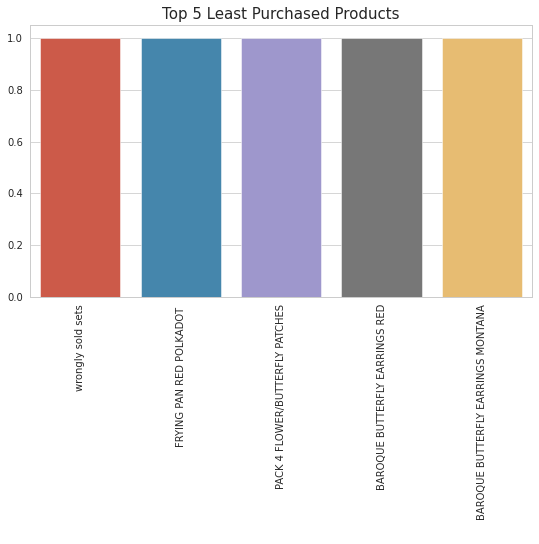

In [54]:
# The most purchased products from
sns.set_style("whitegrid")
most_purchase = df.groupby('Description')['Quantity'].count().sort_values(ascending=True)[:5]

plt.figure(figsize=(9,5))
sns.barplot(x=most_purchase.index, y=most_purchase.values)
plt.xticks(rotation=90)
plt.title("Top 5 Least Purchased Products", size=15)
plt.xlabel(" ")
plt.show()

**What are the most popular products that are bought in the UK?**

In [55]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)[:10]
uk_product

,StockCode,Description,Quantity
2587,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2089,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
3005,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
3427,85099B,JUMBO BAG RED RETROSPOT,41878
3442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34630
3262,84879,ASSORTED COLOUR BIRD ORNAMENT,32628
1104,22197,POPCORN HOLDER,28923
1499,22616,PACK OF 12 LONDON TISSUES,24321
77,17003,BROCADE RING PURSE,22675
429,21212,PACK OF 72 RETROSPOT CAKE CASES,22442


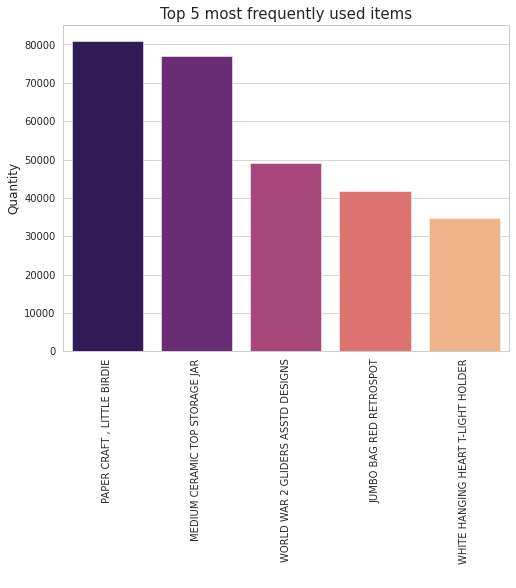

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x= uk_product.Description[:5],y=uk_product.Quantity[:5], data=uk_product,palette='magma')
plt.title("Top 5 most frequently used items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

**Which are the least popular products in UK?**

In [57]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=True)[:10]
uk_product

,StockCode,Description,Quantity
490,21310,CAPIZ CHANDELIER,1
3573,90014C,SILVER AND BLACK ORBIT NECKLACE,1
3674,90100,NECKLACE+BRACELET SET PINK DAISY,1
2603,35597A,DUSTY PINK CHRISTMAS TREE 30CM,1
2604,35597B,BLACKCHRISTMAS TREE 30CM,1
3678,90104,PURPLE FRANGIPANI HAIRCLIP,1
3815,90202B,WHITE ENAMEL FLOWER HAIR TIE,1
3104,84569C,PACK 4 FLOWER/BUTTERFLY PATCHES,1
3632,90055,CRACKED GLAZE EARRINGS BROWN,1
3648,90065B,BLACK VINT ART DEC CRYSTAL BRACELET,1


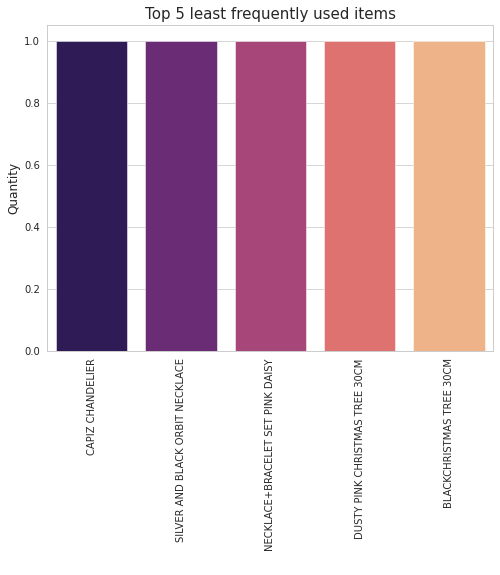

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x= uk_product.Description[:5],y=uk_product.Quantity[:5], data=uk_product,palette='magma')
plt.title("Top 5 least frequently used items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [59]:
# creating function for plotting graph 
def plot_count(parameter,datasource):
   sns.set_style("whitegrid")
   fig, ax = plt.subplots()
   fig.set_size_inches(15, 9)
   p=sns.countplot(x=parameter, data=datasource)

#### **Visualising how months are performing dayswise**

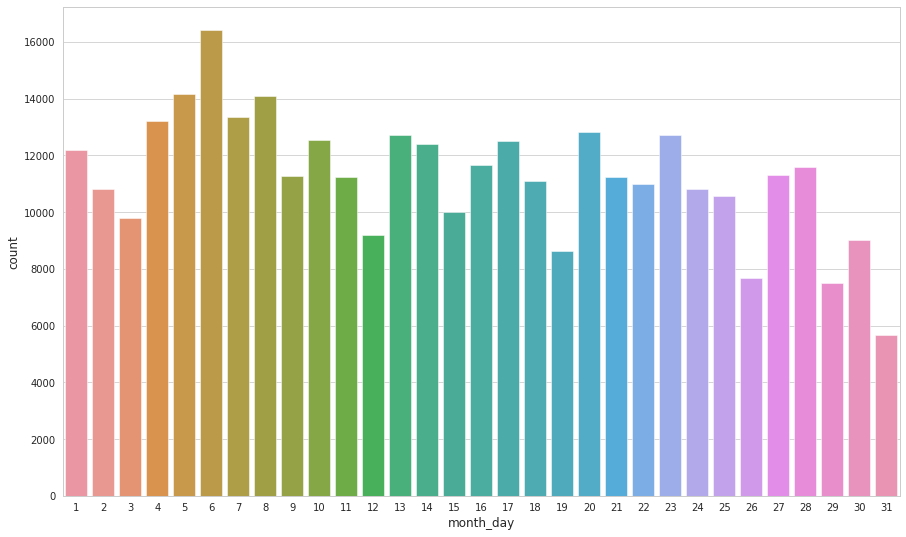

In [60]:
#visualising how months are performing dayswise in our dataset 
plot_count('month_day',df_uk)

**From this it is observed that we have good sales in first 8 days of the month specifically on 6th day. As we go towards month end the sales starts declining.**

#### **Visualising monthly trend**

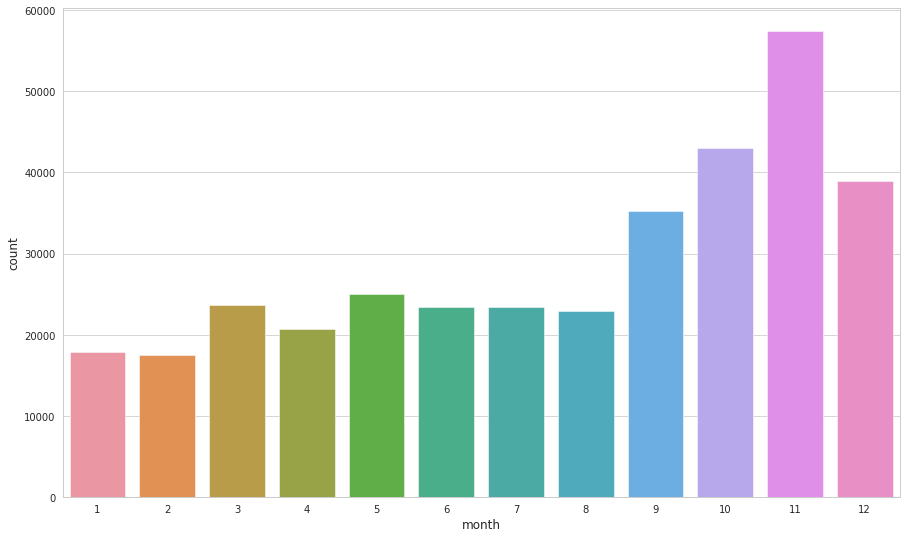

In [61]:
#visualising monthly trend in our dataset
plot_count('month',df_uk)

**Novemeber is the best performing month in our store. Also note that for second quarter we have consistent performance but as we move towards last quarter there is sudden hike.**

####**Plotting for hour and month_day**

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


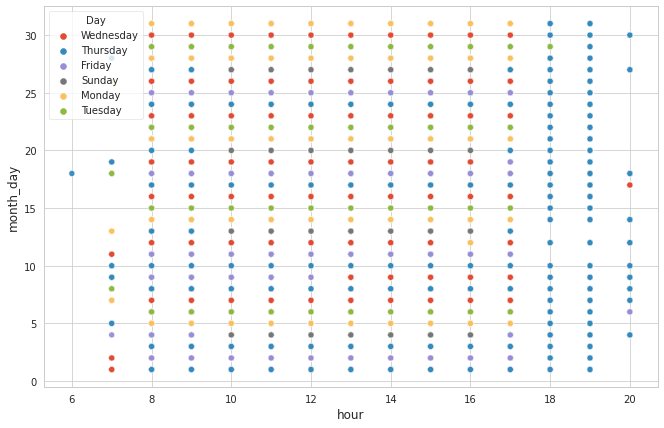

In [62]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='hour', y='month_day', hue='Day',data=df_uk,x_bins=50,y_bins=50,alpha=0.95);

**This shows that on Thursday evening we have maximum number of sales throughout the month.**

###**Heatmap of the Dataset**

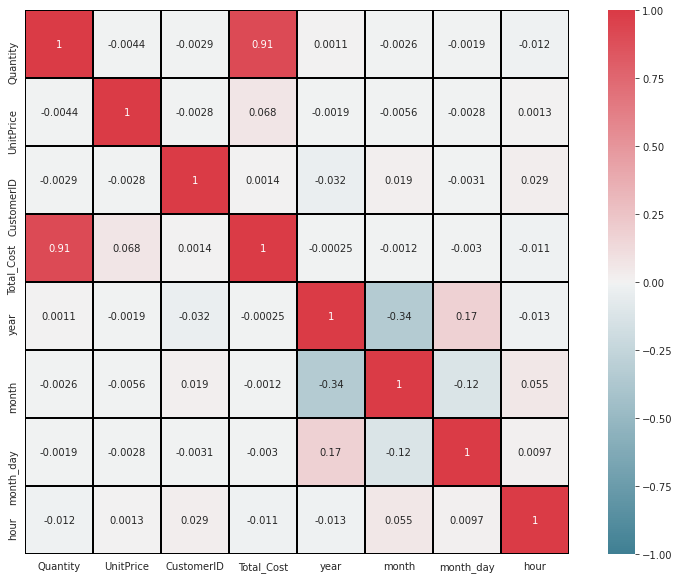

In [63]:
# how all feautures are related to each other
f, ax = plt.subplots(figsize=(14,10))
corr = df_uk.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

***Qunatity and unit price are highly correlated but one interesting thing to observe here is that CustomerId and hour also has a correlation that means there is a relation between specific customer and his/her visiting hour in online retail store.***  

#### **Distribution of quantities**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Quantities')

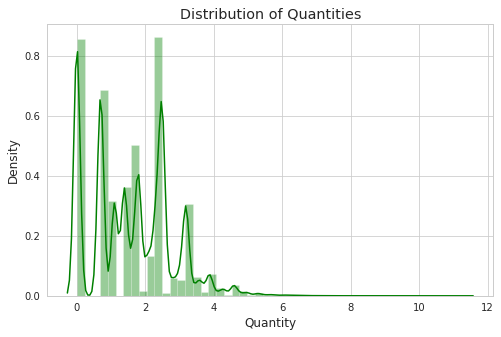

In [64]:
#visulasing distribution of quantities in dataset
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.distplot(np.log(df_uk['Quantity']),color="g");
plt.title('Distribution of Quantities')

**So we can see that quantities purchased by customers are not normally distributed.**

####**Distribution of UnitPrice**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of UnitPrice')

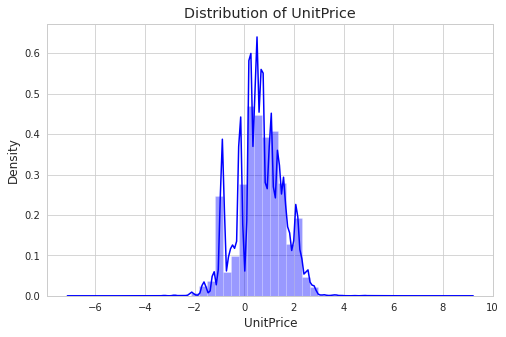

In [65]:
#visulasing distribution of UnitPrice in dataset
df2= df_uk[df_uk['UnitPrice'] != 0]
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.distplot(np.log(df2['UnitPrice']),color="b");
plt.title('Distribution of UnitPrice')

**We can see that UnitPrice is close to normally distributed.**

####**Distribution of Total_Cost**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


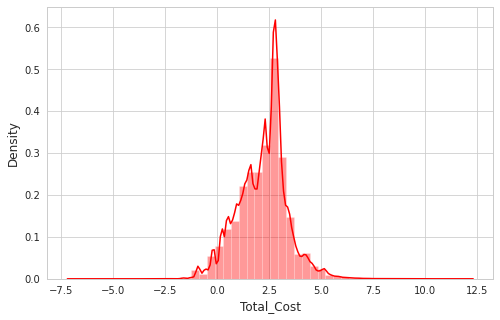

In [66]:
#visulasing distribution of total cost in dataset
df2= df_uk[df_uk['Total_Cost'] != 0]
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.distplot(np.log(df2['Total_Cost']),color="r");

**We can see that Total_Cost is close to normally distributed.**

##**Feature Engineering**

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Customer ID / Email / Name etc: to identify them

Recency (R) as days since last purchase: How many days ago was their last purchase?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store?

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent?

Quintiles is our recommended method to calculate RFM score

0-20 = 1st quintile

20-40 = 2nd quintile

40-60 = 3rd quintile

60-80 = 4th quintile

80-100 = 5th quintile

RFM calculations summary

Take your customer data, give a score from 1-5 to R, F and M values. Using quintiles works best since it works for all businesses and adjusts according to your data.


In [67]:
#selecting specific features from dataset and creating new
uk_data=df_uk[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Total_Cost']]

In [68]:
#first  5 observations of our UK dataset
uk_data.head(2)

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Total_Cost
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [69]:
#checking maximum and minimum timestamp in dataset
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

**Recency = Latest Date - Last Inovice Data**

**Frequency = count of invoice no. of transaction(s)**

**Monetary = Sum of Total Amount for each customer**

In [70]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
#creating  dataframe for Recency ,Frequency, Monetary as 'rfm'
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total_Cost': lambda price: price.sum()})

In [72]:
#columns in rfm dataframe
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Total_Cost'], dtype='object')

In [73]:
#renaming columns
rfm.columns=['recency','frequency','monetary']

In [74]:
#convert recency as int type
rfm['recency'] = rfm['recency'].astype(int)

In [75]:
#resetting index of dataframe
rfm.reset_index(inplace = True)
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [76]:
#checking updated names of rfm
rfm.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary'], dtype='object')

###**Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.**

In [77]:
#statistical description of rfm dataset
rfm.describe()

,CustomerID,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,89.065800,1857.950687
std,1576.823683,99.528532,214.022733,7477.736186
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,298.110000
50%,15569.000000,50.000000,40.000000,644.300000
75%,16913.000000,142.000000,98.000000,1570.810000
max,18287.000000,373.000000,7676.000000,259657.300000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


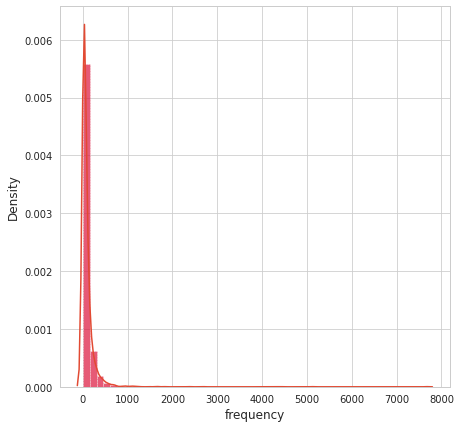

In [78]:
#checking frequency distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.distplot(rfm["frequency"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


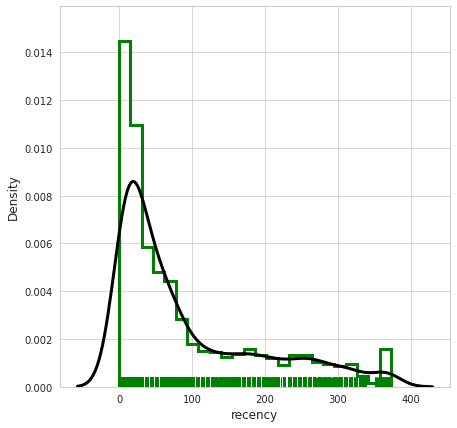

In [79]:
#checkig recency distribution in our dataset

x= rfm['recency']

plt.figure(figsize=(7,7))
sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
             )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


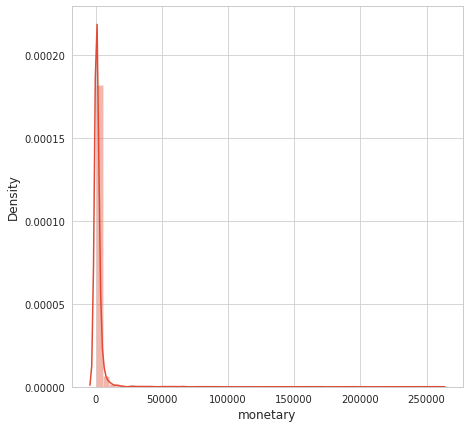

In [80]:
#checkig monetary distribution in our dataset
x = rfm['monetary']
plt.figure(figsize=(7,7))
sns.distplot(x)

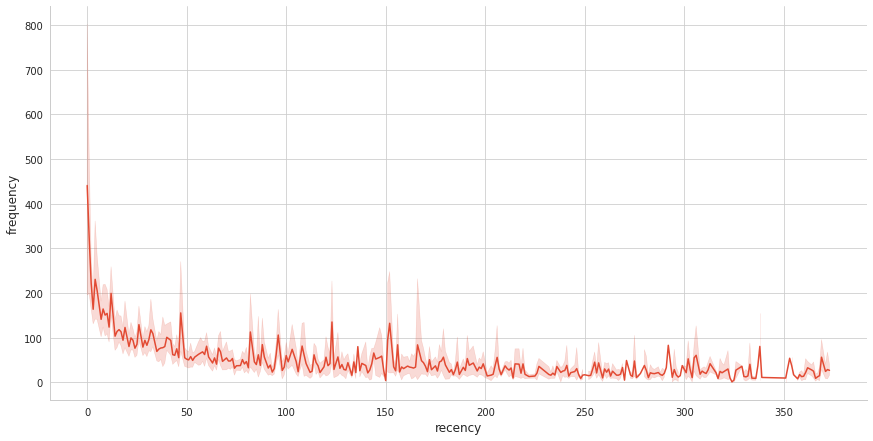

In [81]:
#plotting relationship between recency and frequency

sns.relplot(x="recency", y="frequency", kind="line", data=rfm,height=6,aspect=2 );

**As we can see that when recency goes above 20 frequency drops significantly**

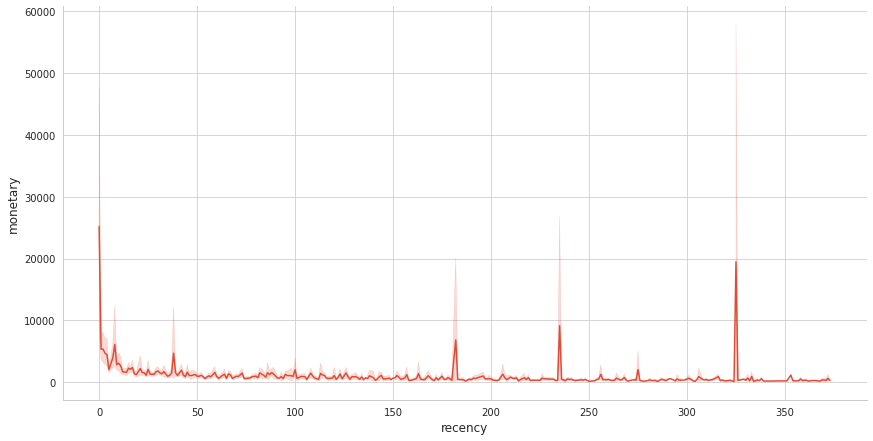

In [82]:
#plotting relationship between recency and monetary
sns.relplot(x="recency", y="monetary", kind="line", data=rfm,height=6,aspect=2);

**The sudden spikes shows that there are some customers whose arrival rate is not uniform seldom adds a good monetary value.**

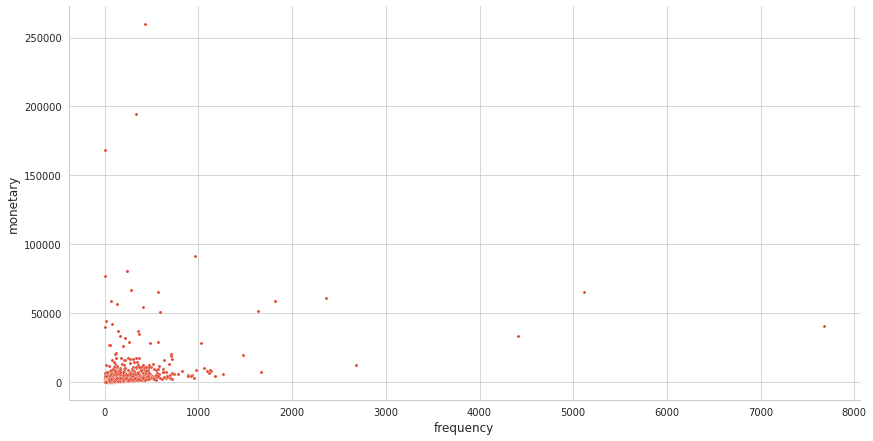

In [83]:
#plotting relationship between monetory and frequency
sns.relplot(x="frequency", y="monetary", kind="scatter", data=rfm,s=10,height=6,aspect=2);

**This shows that we have most of our monetary values comes from frequnecy<800**

In [84]:
#defining and adding  quartiles for rfm score
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4','5'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['5','4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['5','4','3','2','1'])

In [85]:
#checking observations from updated dataset 
rfm.head(2)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346.0,325,1,77183.60,5,5,1
1,12747.0,2,103,4196.01,1,2,1


In [86]:
#adding scores and concatenating them as 125 different observations (from 111 to 555) 
rfm['rfm_rating'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm['rfm_concat'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat
0,12346.0,325,1,77183.60,5,5,1,11,551
1,12747.0,2,103,4196.01,1,2,1,4,121
2,12748.0,0,4413,33053.19,1,1,1,3,111
3,12749.0,3,199,4090.88,1,1,1,3,111
4,12820.0,3,59,942.34,1,2,2,5,122


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


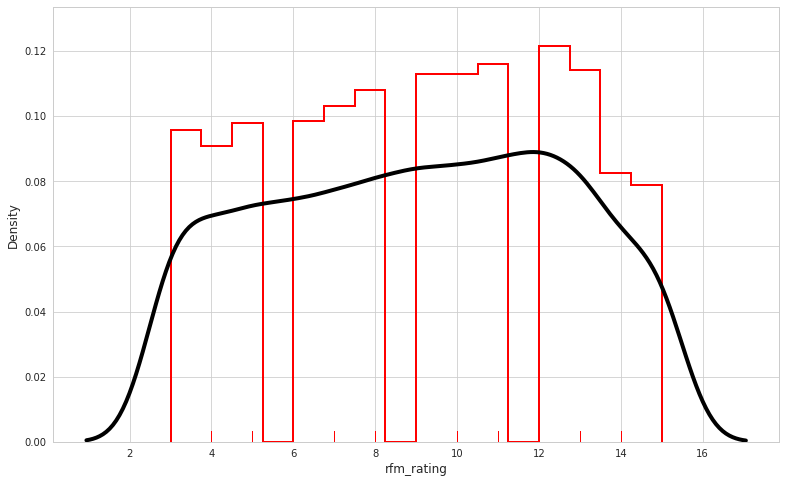

In [87]:
#plotting distribution of rfm rating
x= rfm['rfm_rating']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 4, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "r"},
        
             )

In [88]:
df_cust = rfm.copy()

In [89]:
df_cust.isin([0]).any().any()

True

In [90]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3921 non-null   float64 
 1   recency     3921 non-null   int64   
 2   frequency   3921 non-null   int64   
 3   monetary    3921 non-null   float64 
 4   r_quartile  3921 non-null   category
 5   f_quartile  3921 non-null   category
 6   m_quartile  3921 non-null   category
 7   rfm_rating  3921 non-null   int64   
 8   rfm_concat  3921 non-null   object  
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 196.0+ KB


In [91]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['monetary'] = [handle_neg_n_zero(x) for x in rfm.monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [92]:
#creating new feature by applying log on values after removing zero and neagtive values from rfm
from sklearn import preprocessing
from numpy import math
rfm['recency_log'] = rfm['recency'].apply(math.log)
rfm['frequency_log'] = rfm['frequency'].apply(math.log)
rfm['monetary_log'] = rfm['monetary'].apply(math.log)

#***Applying Unsupervised Algorithm for clustering***

In [93]:
#importing libraries and model
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#selecting data for preprocessig(scaling) & training for fitting on our model
from sklearn.cluster import KMeans
rec_mon=['recency_log','monetary_log']
X_features_rec_mon=rfm[rec_mon].values
scaler=preprocessing.StandardScaler()
X_rm=scaler.fit_transform(X_features_rec_mon)
X=X_rm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42245969115581433
For n_clusters = 3, silhouette score is 0.34638921907182796
For n_clusters = 4, silhouette score is 0.3659009578745068
For n_clusters = 5, silhouette score is 0.3361060974159394
For n_clusters = 6, silhouette score is 0.34331908468325656
For n_clusters = 7, silhouette score is 0.34431287961514784
For n_clusters = 8, silhouette score is 0.3396094889011004
For n_clusters = 9, silhouette score is 0.3472246473820605
For n_clusters = 10, silhouette score is 0.3466474263945175
For n_clusters = 11, silhouette score is 0.33790033007510883
For n_clusters = 12, silhouette score is 0.34427947312522117
For n_clusters = 13, silhouette score is 0.3427723716568418
For n_clusters = 14, silhouette score is 0.3417939176346701
For n_clusters = 15, silhouette score is 0.33820935627969395


***We have good silhouette score for 2 clusters.***

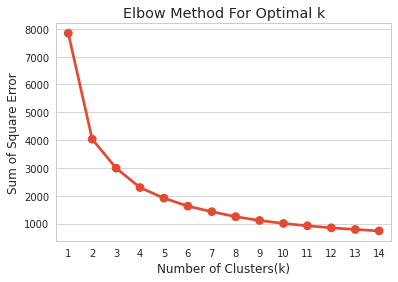

In [94]:
#visualising by elbow method
sse = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sse[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [95]:
#defining clusters as 2 and applying kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

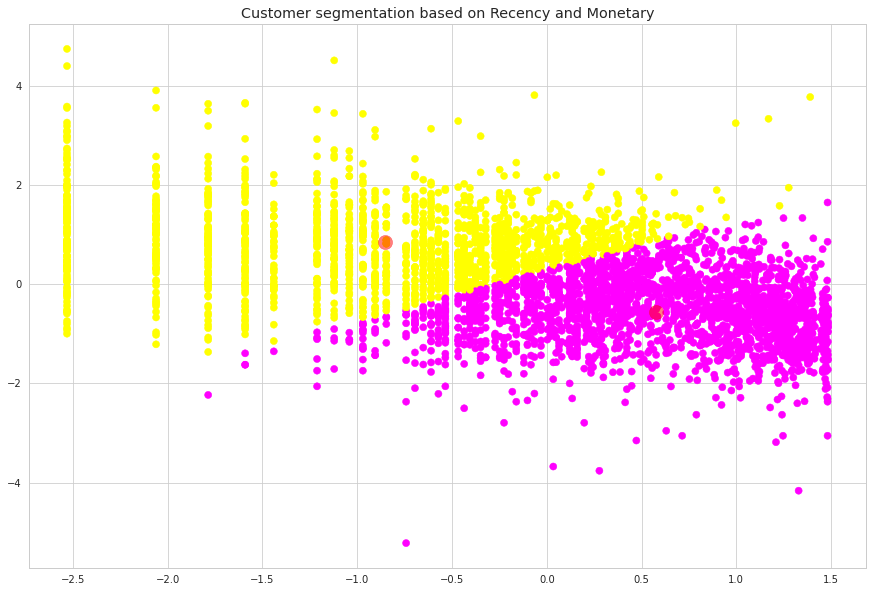

In [96]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(15,10))
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

***According to this we have only two clusters of customers.***

In [97]:
#taking as values and transforming in our dataset 
feature_vector=['recency_log','frequency_log','monetary_log']
X_features=rfm[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39564327592299686
For n_clusters = 3 The average silhouette_score is : 0.30681290240921677
For n_clusters = 4 The average silhouette_score is : 0.2984659739981942
For n_clusters = 5 The average silhouette_score is : 0.28066853006266396
For n_clusters = 6 The average silhouette_score is : 0.2781574659497782


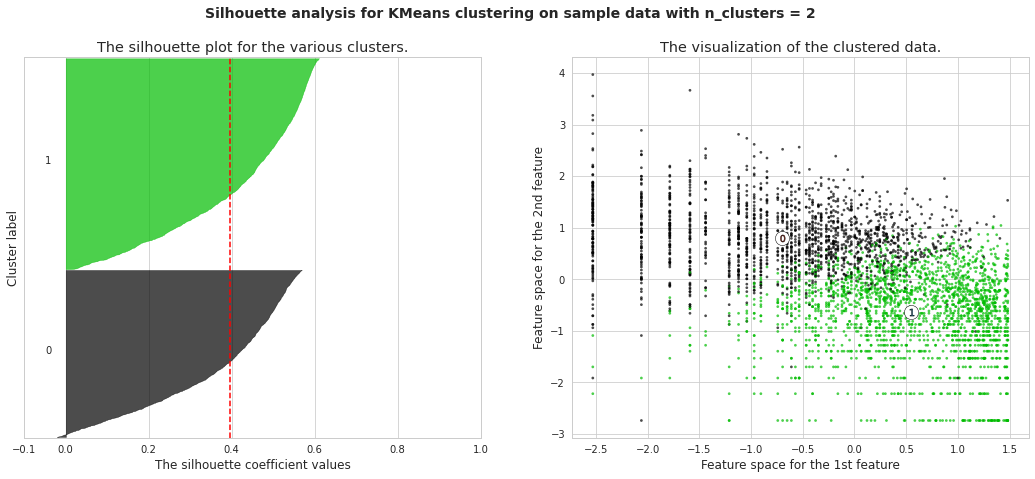

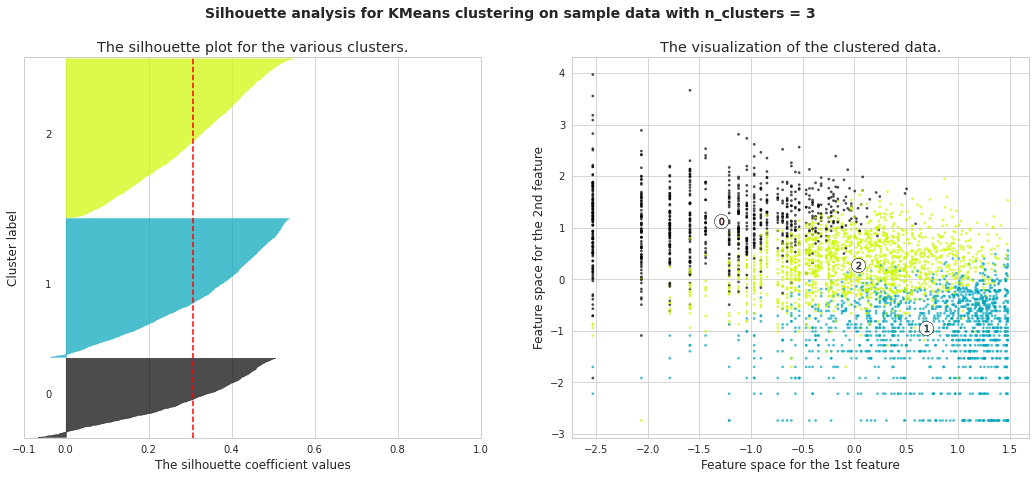

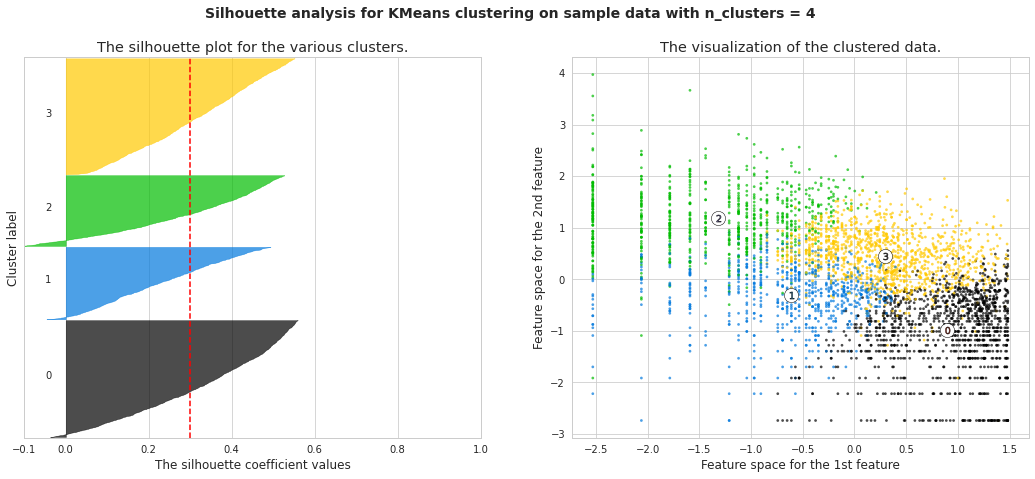

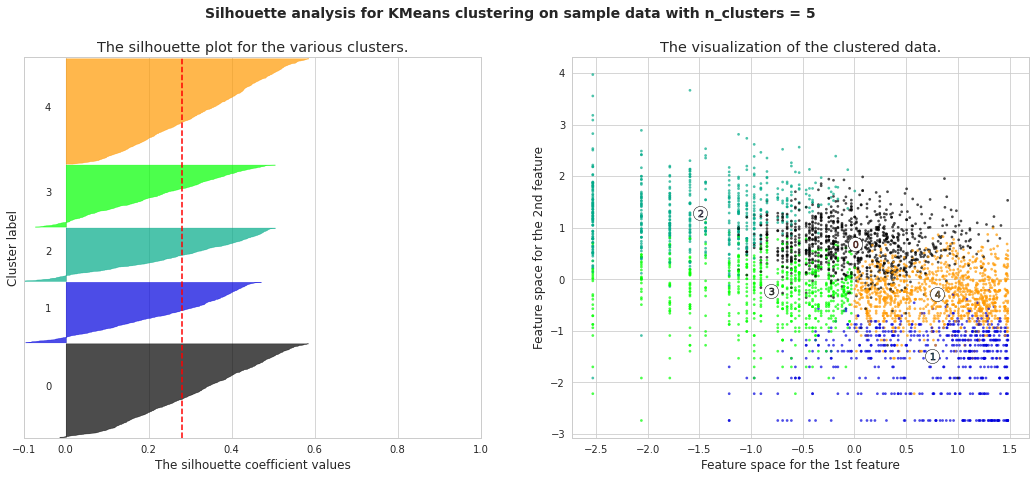

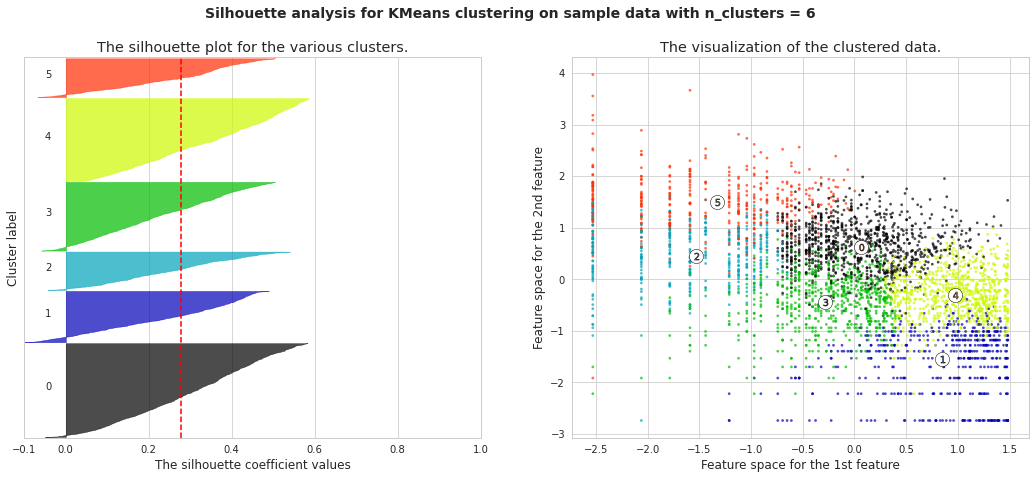

In [98]:
#applying silhoutte score method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

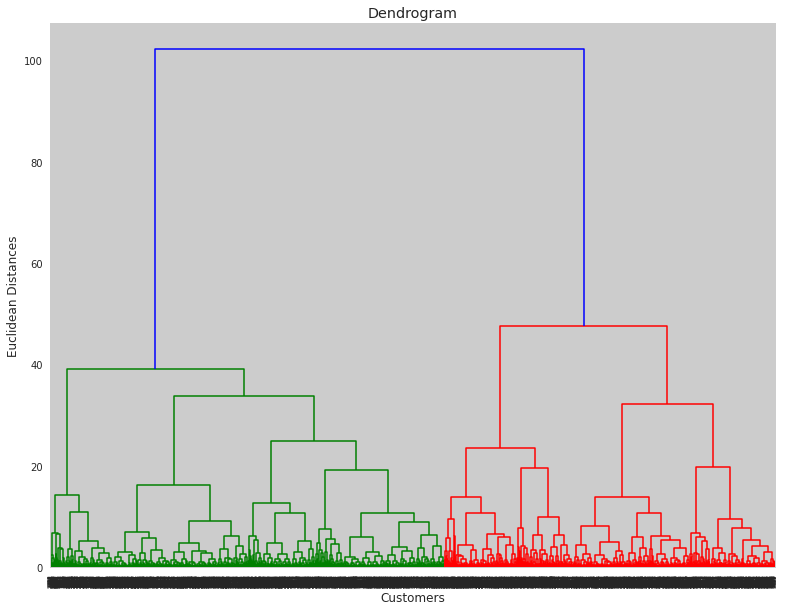

In [99]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [100]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

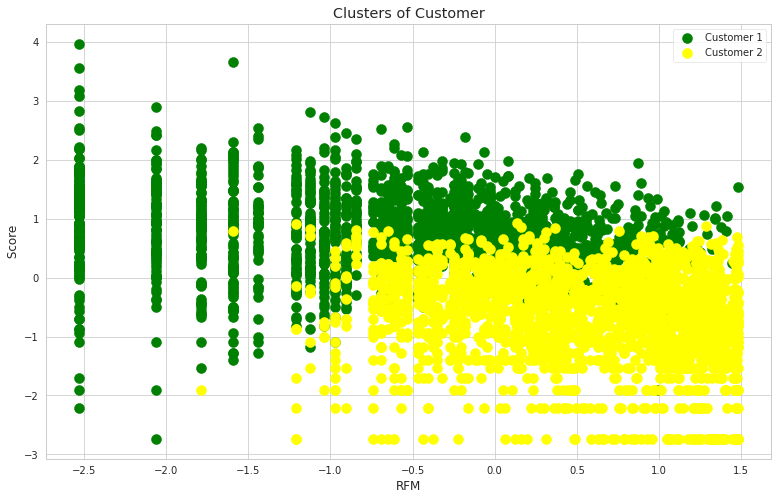

In [101]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel(' Score ')
plt.legend()
plt.show()

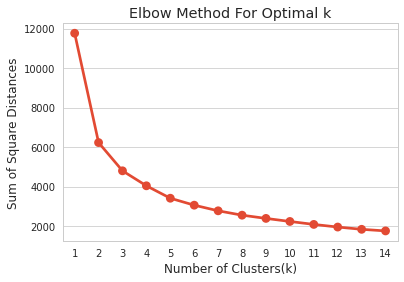

In [102]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***Making 4 clusters according to elbow method***

In [103]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Finding the clusters and assigning values for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head(10)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster
0,12346.0,325,1,77183.60,5,5,1,11,551,5.783825,0.000000,11.253942,2
1,12747.0,2,103,4196.01,1,2,1,4,121,0.693147,4.634729,8.341889,0
2,12748.0,1,4413,33053.19,1,1,1,3,111,0.000000,8.392310,10.405873,0
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,0
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,0
5,12821.0,214,6,92.72,5,5,5,15,555,5.365976,1.791759,4.529584,1
6,12822.0,70,46,948.88,3,3,2,8,332,4.248495,3.828641,6.855282,2
7,12823.0,74,5,1759.50,4,5,2,11,452,4.304065,1.609438,7.472785,1
8,12824.0,59,25,397.12,3,4,4,11,344,4.077537,3.218876,5.984239,3
9,12826.0,2,91,1474.72,1,2,2,5,122,0.693147,4.510860,7.296223,0


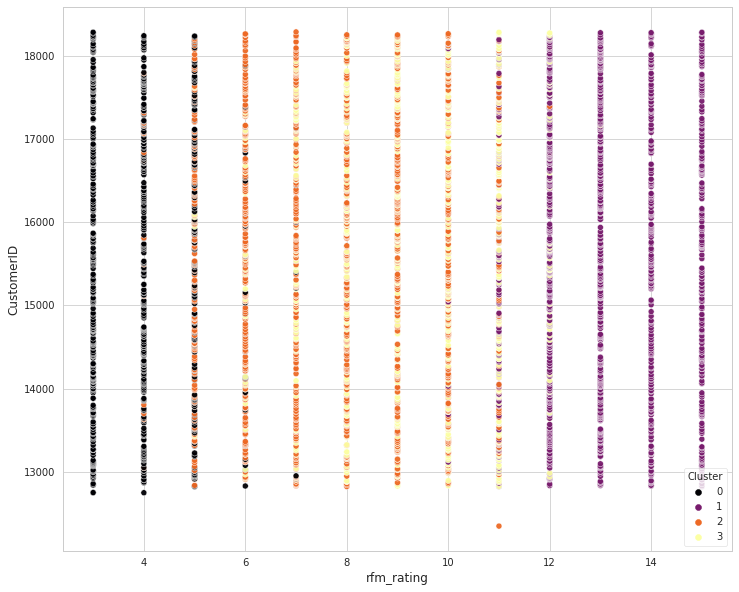

In [104]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='rfm_rating', y='CustomerID', hue='Cluster',palette='inferno',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

***This shows that we have highest rfm_rating for 1st cluster. But there is a caveat rfm rating has maximum values as 15 but recency value should be less in order to have observation of a good customer.*** 

In [105]:
#creating new colum for frequency and monetary value
rfm['freq_mont']  = rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)

In [106]:
#checking top 2 values
rfm.head(2)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
0,12346.0,325,1,77183.60,5,5,1,11,551,5.783825,0.000000,11.253942,2,6
1,12747.0,2,103,4196.01,1,2,1,4,121,0.693147,4.634729,8.341889,0,3


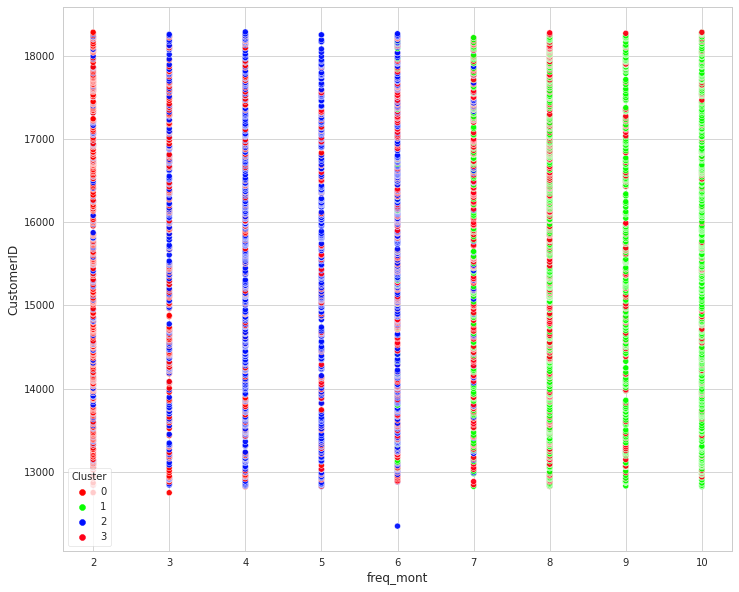

In [107]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='freq_mont', y='CustomerID', hue='Cluster',palette='hsv',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

***From this we can observe that cluster 1 have the maximum value of frequency and monetary i.e. above 8 so we can focus and manage our resources more effectively on these observations for each cluster.***

In [108]:
#checking how many such cutomers are there for good frequency and monetary score rating
c1=rfm.loc[rfm['freq_mont'] > 8]
c1

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
5,12821.0,214,6,92.72,5,5,5,15,555,5.365976,1.791759,4.529584,1,10
12,12829.0,336,11,293.00,5,5,4,14,554,5.817111,2.397895,5.680173,1,9
14,12831.0,262,9,215.05,5,5,5,15,555,5.568345,2.197225,5.370871,1,10
19,12837.0,173,12,134.10,4,5,5,14,455,5.153292,2.484907,4.898586,1,10
34,12855.0,372,3,38.10,5,5,5,15,555,5.918894,1.098612,3.640214,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,18277.0,58,8,110.38,3,5,5,13,355,4.060443,2.079442,4.703929,1,10
3915,18278.0,73,9,173.90,4,5,5,14,455,4.290459,2.197225,5.158480,1,10
3916,18280.0,277,10,180.60,5,5,5,15,555,5.624018,2.302585,5.196285,1,10
3917,18281.0,180,7,80.82,5,5,5,15,555,5.192957,1.945910,4.392224,1,10


In [109]:
#checking those customers having low frequency and monetary rating 
c2=rfm.loc[rfm['freq_mont'] < 6]
c2

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
1,12747.0,2,103,4196.01,1,2,1,4,121,0.693147,4.634729,8.341889,0,3
2,12748.0,1,4413,33053.19,1,1,1,3,111,0.000000,8.392310,10.405873,0,2
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,0,2
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,0,4
6,12822.0,70,46,948.88,3,3,2,8,332,4.248495,3.828641,6.855282,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,18260.0,172,133,2628.35,4,1,1,6,411,5.147494,4.890349,7.874112,2,2
3905,18263.0,25,61,1213.16,2,2,2,6,222,3.218876,4.110874,7.100984,2,4
3910,18272.0,2,166,3078.58,1,1,1,3,111,0.693147,5.111988,8.032224,0,2
3919,18283.0,3,721,2045.53,1,1,1,3,111,1.098612,6.580639,7.623412,0,2


***So we have total of 845 customers having very high frequency and monetary(spending score) and 1671 customers having low frequency and monetary values.***

***We can target this cluster of 845 Customers by identifying them via ID and can do some strategic planning to target each segment.***

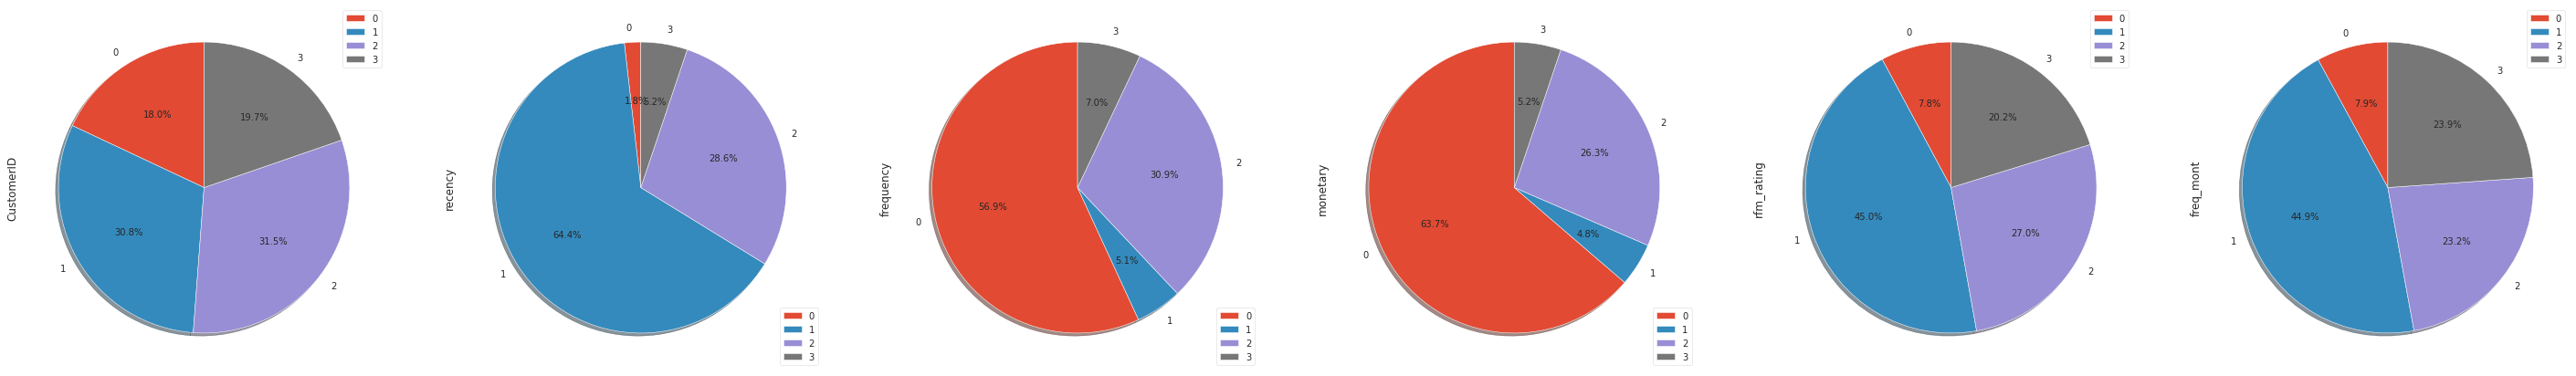

In [110]:
#visualising all clsuters with pie chart
pie_df = rfm[['CustomerID', 'recency','frequency', 'monetary','rfm_rating', 'freq_mont','Cluster']]

pie_df.groupby(['Cluster']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(50,10), autopct='%1.1f%%');

***This shows that we have 18% of customers belonging to 1st cluster and they also contribute to our 64% monetary value. Similarly we can observe for others.*** 

#***Conclusion-***
1. **United Kingdom and Saudi arabia has highest and lowest occurence in the dataset.** 

2. **Month of November has highest sale. Similarly in weekdays Thursday have highest sale.**

3. **We have good sales in first 8 days of the month specifically on 6th day. As we go towards month end the sales starts declining.**

4. **Maximum sales happen on Thursdays and Wednesdays around 11 AM to 4 PM and so we have to start triggering offers and special incentives on these days**

4. **Most frequently used item is PAPER CRAFT,LITTLE BIRDIE	and least frequently used item is CAPIZ CHANDELIER.**

5. **Most purchased item is WHITE HANGING HEART T-LIGHT HOLDER and Least purchased item is FRYING PAN RED POLKADOT.**

6. **The percentage of repeat customers are substantially more than the percentage of one-time customers. Mostly customers are happy with the retail store, We have to convert the one-time customers into repeat customers by offering them good incentives and proper service.**



**High monetary and more frequent(Target customer):**- These are those customer who have good Recceny,Frequency,Monetary.
As from the above hierarchical cluster plot the blue patches are representing those target customer.This means they are spending a lot of moneyand frequently coming to the store so they are very good customer for the store.

**High monetary value but less frequent:** These customers are coming very less in the srtore but whenever they come they are spending a huge amount of money,as dipicted in the (II) plot.

**Low monetary value but more frequent(Careful):** These customers are coming so frequent to the store but spending quite less. These are represented by **Careful** customers with pink patches in the above plot.

**Low monetary and less frequent:** These are the customer who are not the good for the store because they are spending less and are less frequent.


**So after doing customer segmentation we can say the company should focus on High monetary and more frequent(Target customer) and apart from that they can also focus High monetary value but less frequent customer by giving lucrative offers and coupons.** 